In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = '_SRbeforeISRcuts_good_vtx_idOnly_NJetG0'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg{suffix}.coffea')[0]

In [5]:
# Data
data_histo = util.load(f'{prefix}/data{suffix}.coffea')[0]

In [6]:
# sig_histo / bkg_histo is a dictionary of variables
print(sig_histo.keys())

dict_keys(['sel_e1_pt', 'sel_e1_eta', 'sel_e1_phi', 'sel_e1_dxy', 'sel_e1_dxySignif', 'sel_e1_vxy1', 'sel_e1_vz', 'sel_e2_pt', 'sel_e2_eta', 'sel_e2_phi', 'sel_e2_dxy', 'sel_e2_dxySignif', 'sel_e2_vxy1', 'sel_e2_vz', 'sel_vtx_dR', 'sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_leadpT', 'sel_vtx_METdPhi', 'sel_vtx_mindRj', 'sel_vtx_chi2', 'sel_vtx_mass', 'sel_vtx_mindPhiJ', 'sel_vtx_sign', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_type', 'sel_vtx_minEleDrJ', 'sel_vtx_minEleDPhiJ', 'sel_vtx_mass_low', 'sel_vtx_mindxy_low', 'sel_vtx_sign_etaProd', 'sel_vtx_CosThetaColl', 'sel_vtx_LxyCosThetaColl', 'sel_vtx_LxyCosThetaCollZoom', 'sel_vtx_LxyCosThetaCollZoomZoom', 'sel_vtx_eleDphi', 'sel_vtx_maxMiniRelIso', 'sel_vtx_maxMiniRelIsoCorr', 'sel_vtx_vx_vs_vy', 'sel_vtx_phi_vs_METphi', 'PVx_vs_PVy', 'PFMET', 'PFMET1000', 'PFMETphi', 'jetMETdPhi', 'minJetMETdPhi', 'nJets', 'lead_jet_pt', 'lead_jet_eta', 'jetMETratio', 'PVx', 'PVy', 'cutDesc', 'cutflow', 'c

## Signal

In [7]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [8]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections', 'n(good vertex) > 0', 'No b-tagged jets']

In [9]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [10]:
table = eff_cutflow
table.columns = cutnames

In [11]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_Efficiency_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_Efficiency__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_Efficiency__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_Efficiency__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv


In [12]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [13]:
table = cts_cutflow
table.columns = cutnames

In [14]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.3947,38.9378,32.9455
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,164.1743","1,009.6827",865.8970
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,466.2272","1,266.4041","1,085.9821"
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,75.1374,66.0221,56.1465
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,976.3460","1,694.0482","1,435.4929"
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,742.8429","2,335.7195","1,995.4366"
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,632.8390","1,244.0054","1,060.3337"
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,995.1698","25,634.1345","21,956.3457"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,168.2571,149.1288,125.1102
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,212.7201","3,557.4264","3,046.8664"


In [15]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_EventCount_Weighted_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv


In [16]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [17]:
table = raw_cutflow
table.columns = cutnames

In [18]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,28531,25024,21173
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,36636,31774,27249
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,12401,10711,9185
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,12044,10583,9000
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,10969,9402,7967
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,9197,7832,6691
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,2578,1964,1674
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1923,1450,1242
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,651,577,484
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,8853,7476,6403


In [19]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_Raw_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_Raw__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_Raw__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_Raw__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv


### Plot the efficiency

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p1_ct_1_m5to40.png


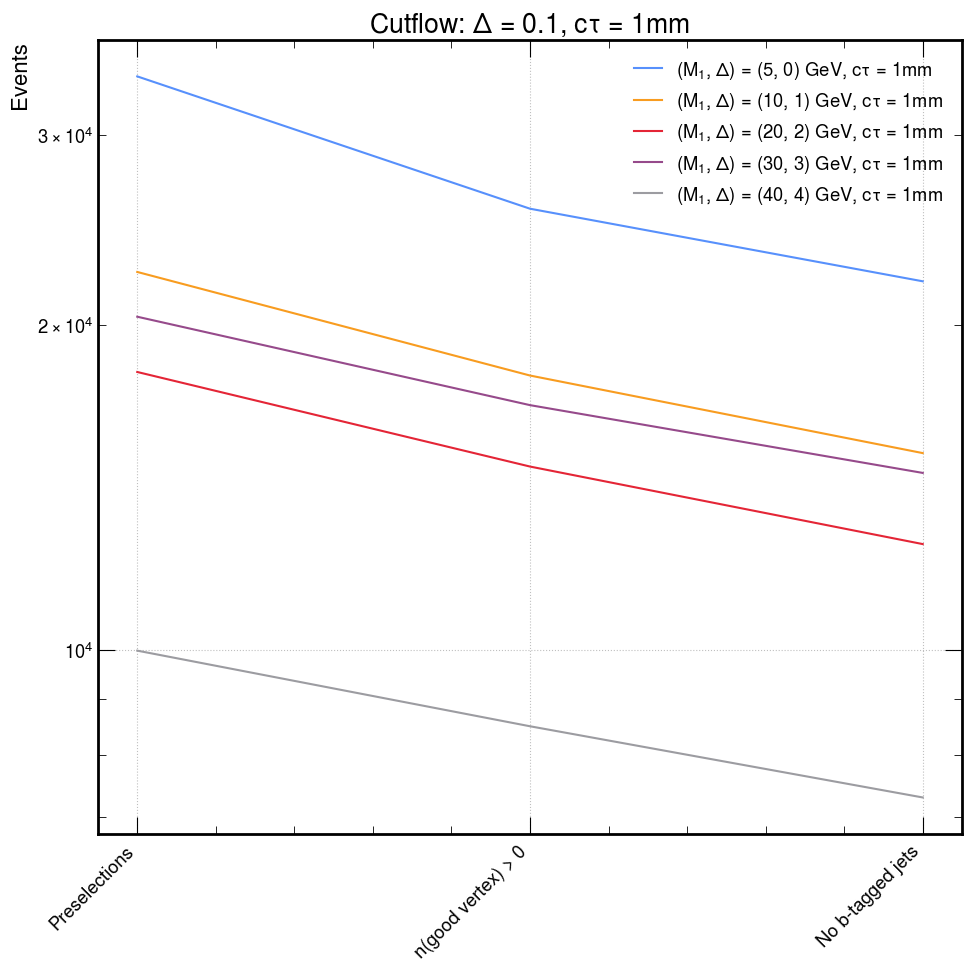

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p1_ct_10_m5to40.png


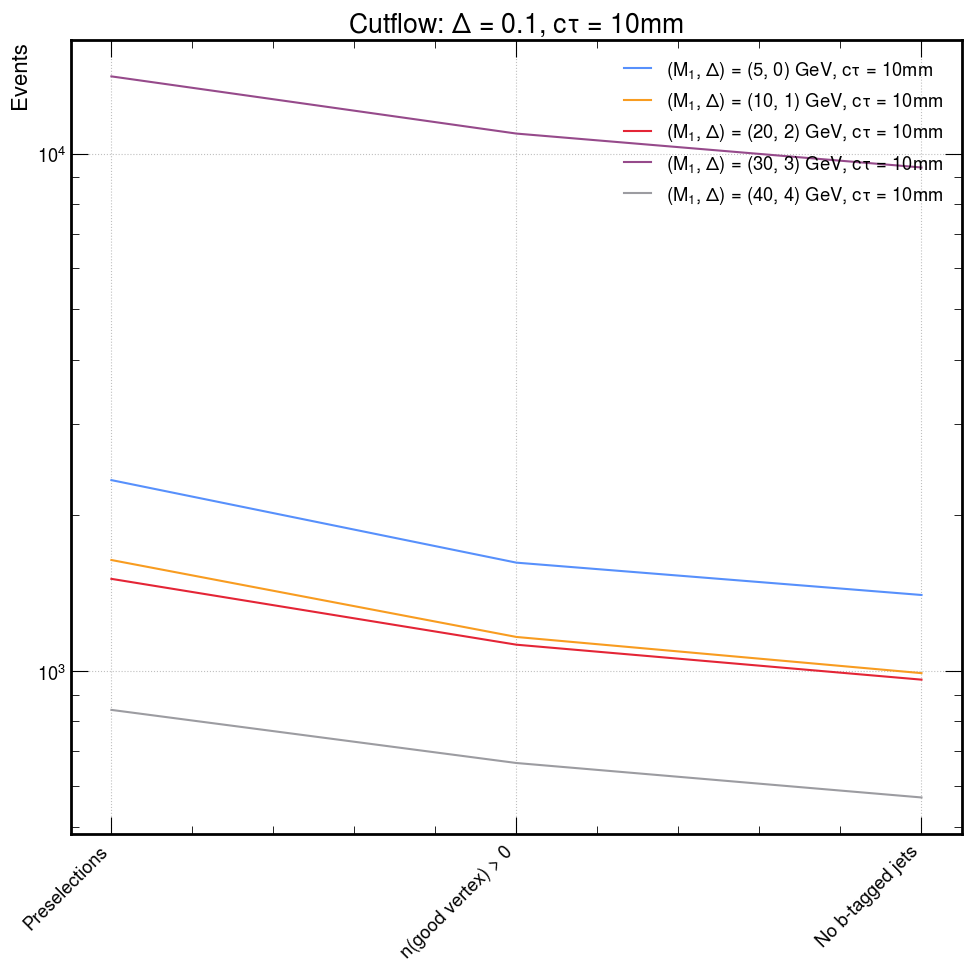

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p1_ct_100_m5to40.png


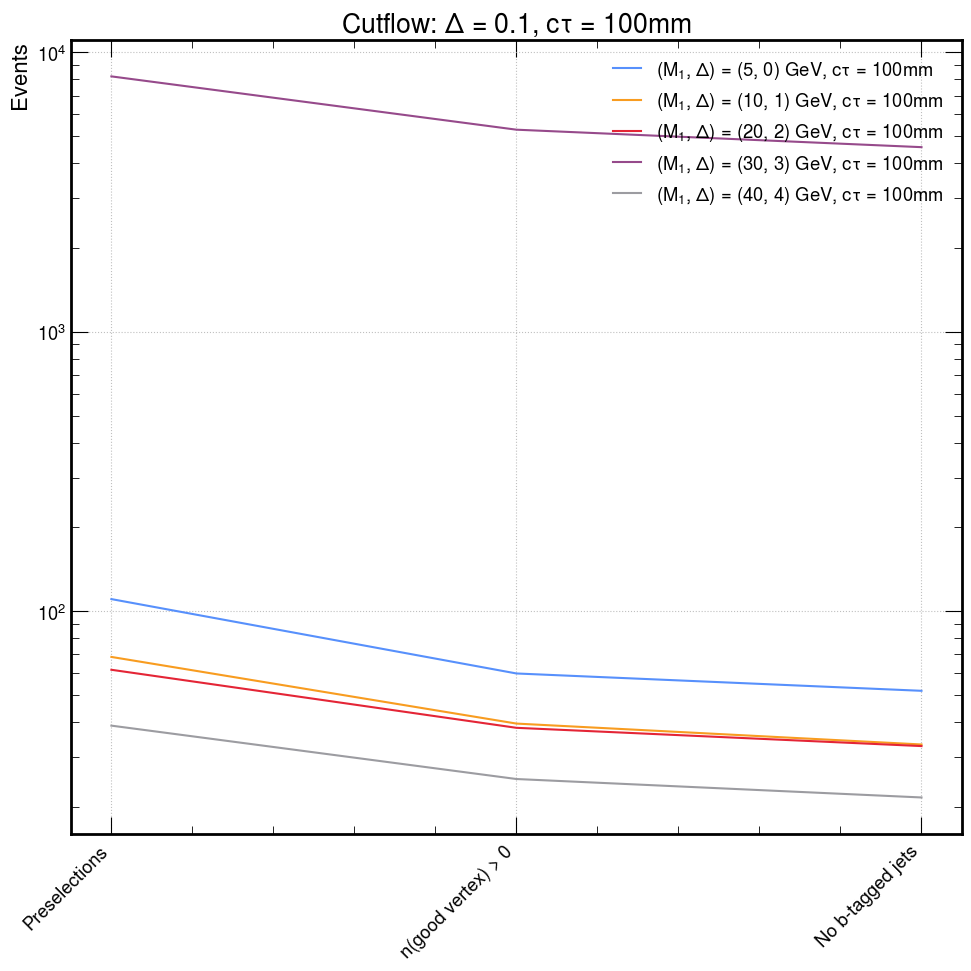

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p2_ct_1_m5to40.png


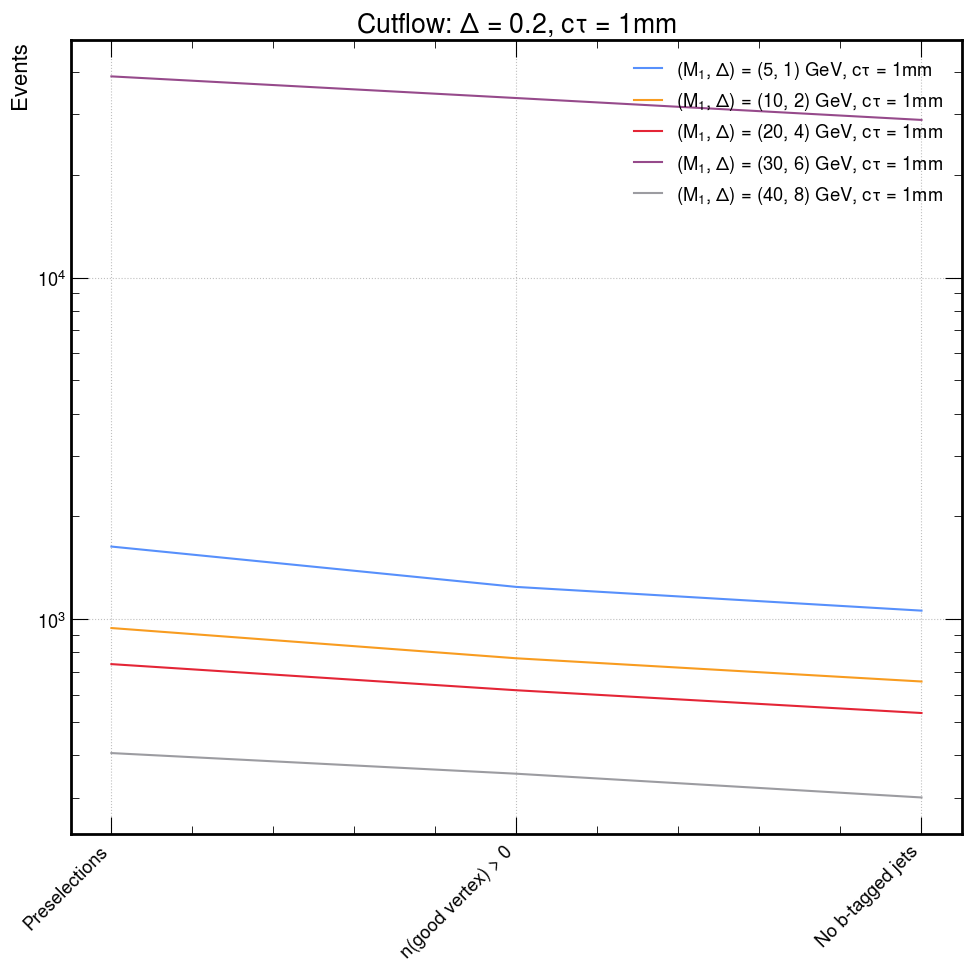

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p2_ct_10_m5to40.png


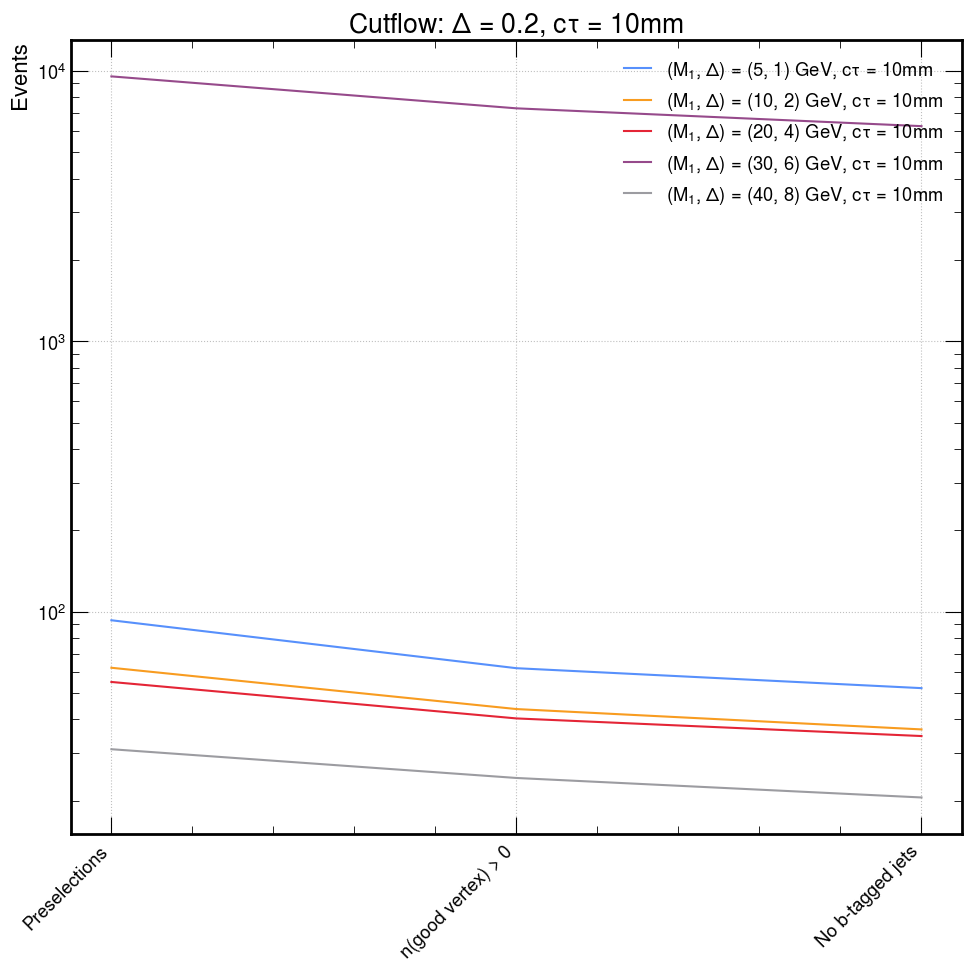

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p2_ct_100_m5to40.png


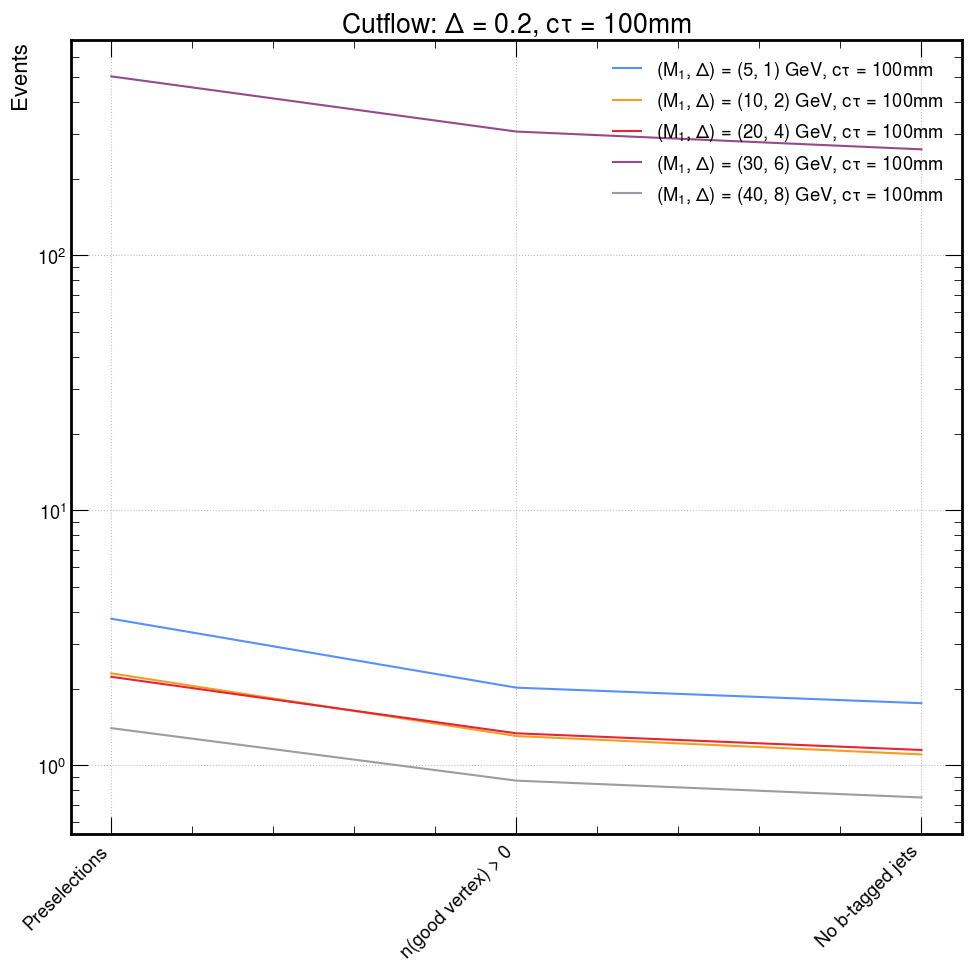

In [20]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p1_ct_1_m50to100.png


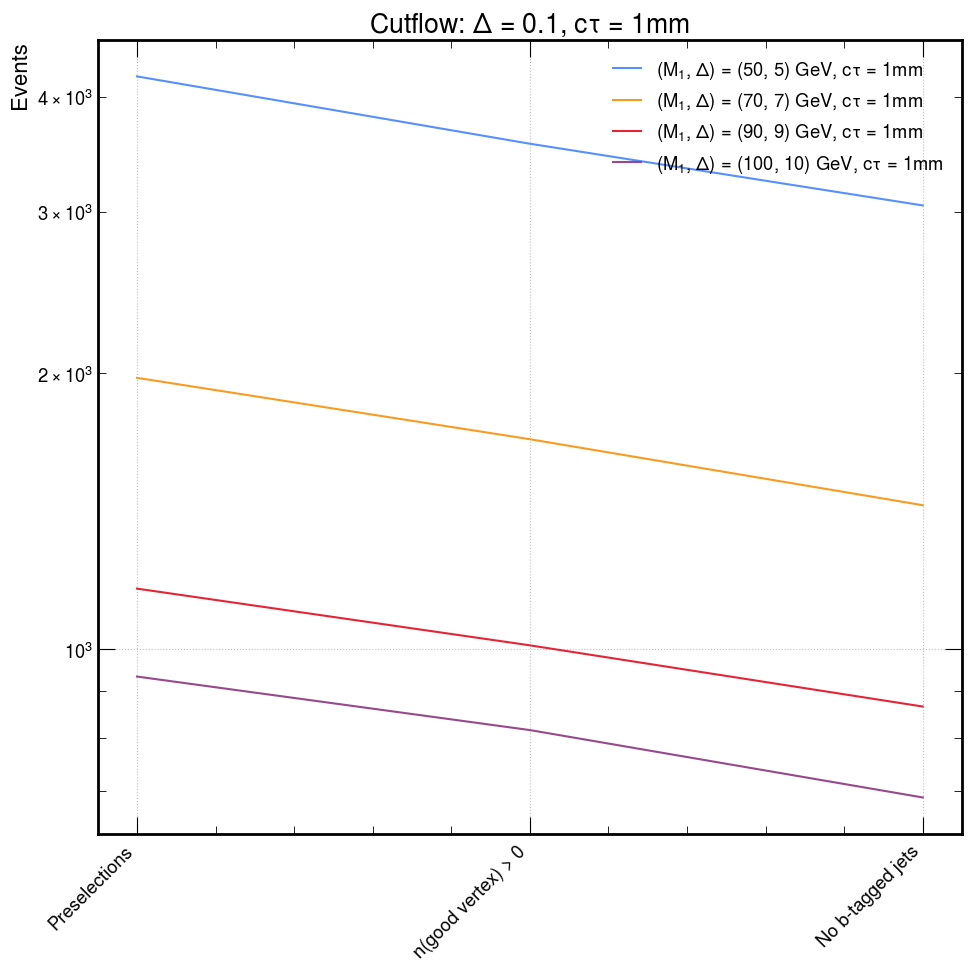

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p1_ct_10_m50to100.png


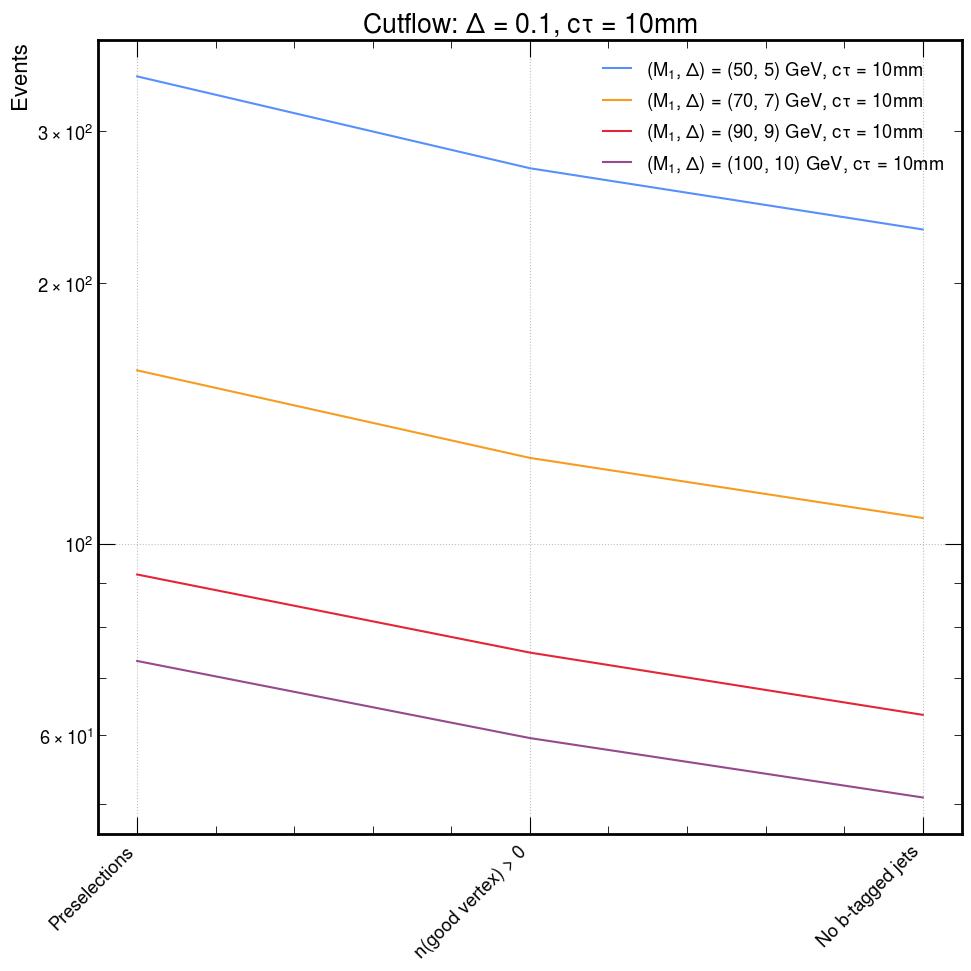

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p1_ct_100_m50to100.png


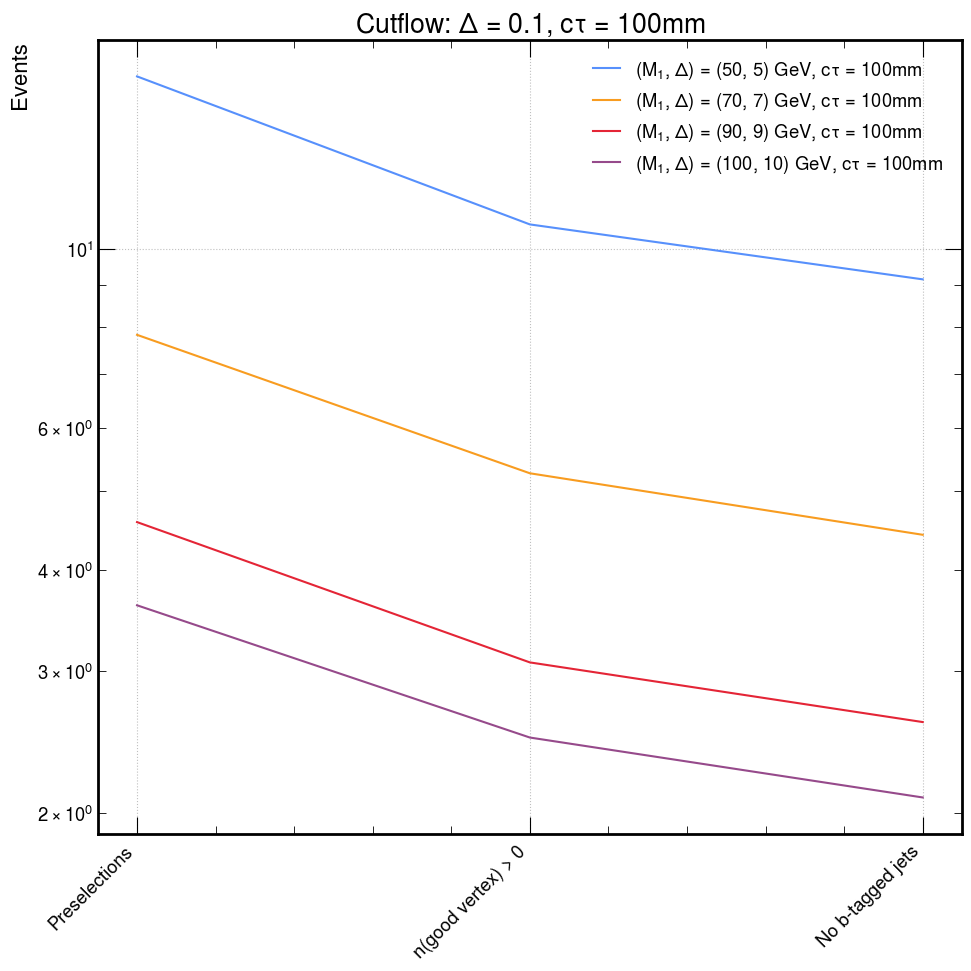

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p2_ct_1_m50to100.png


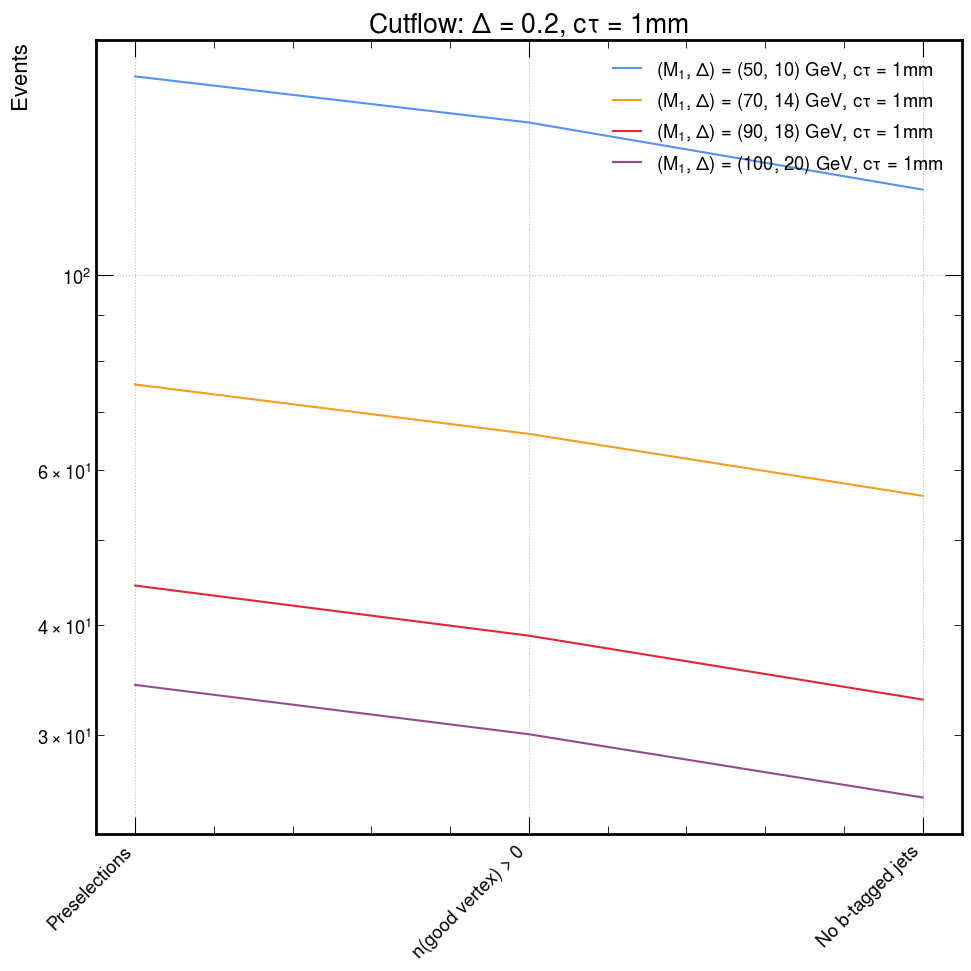

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p2_ct_10_m50to100.png


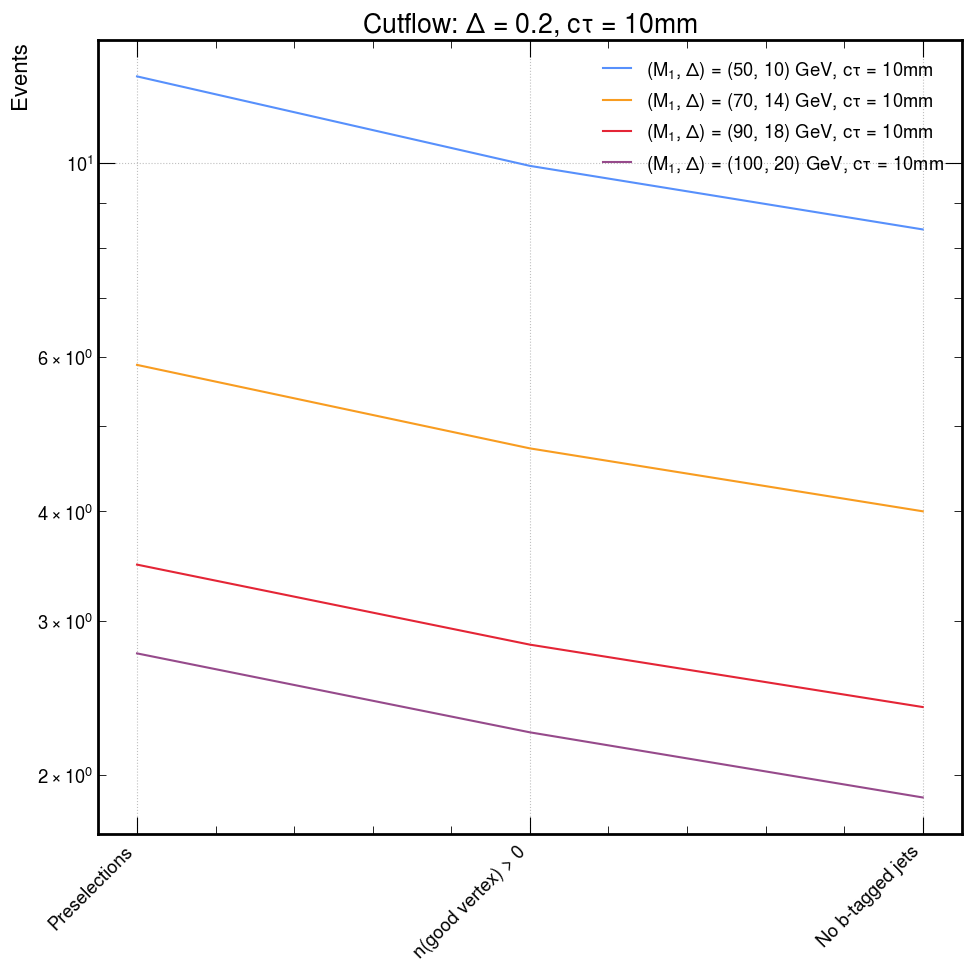

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_signal_delta_0p2_ct_100_m50to100.png


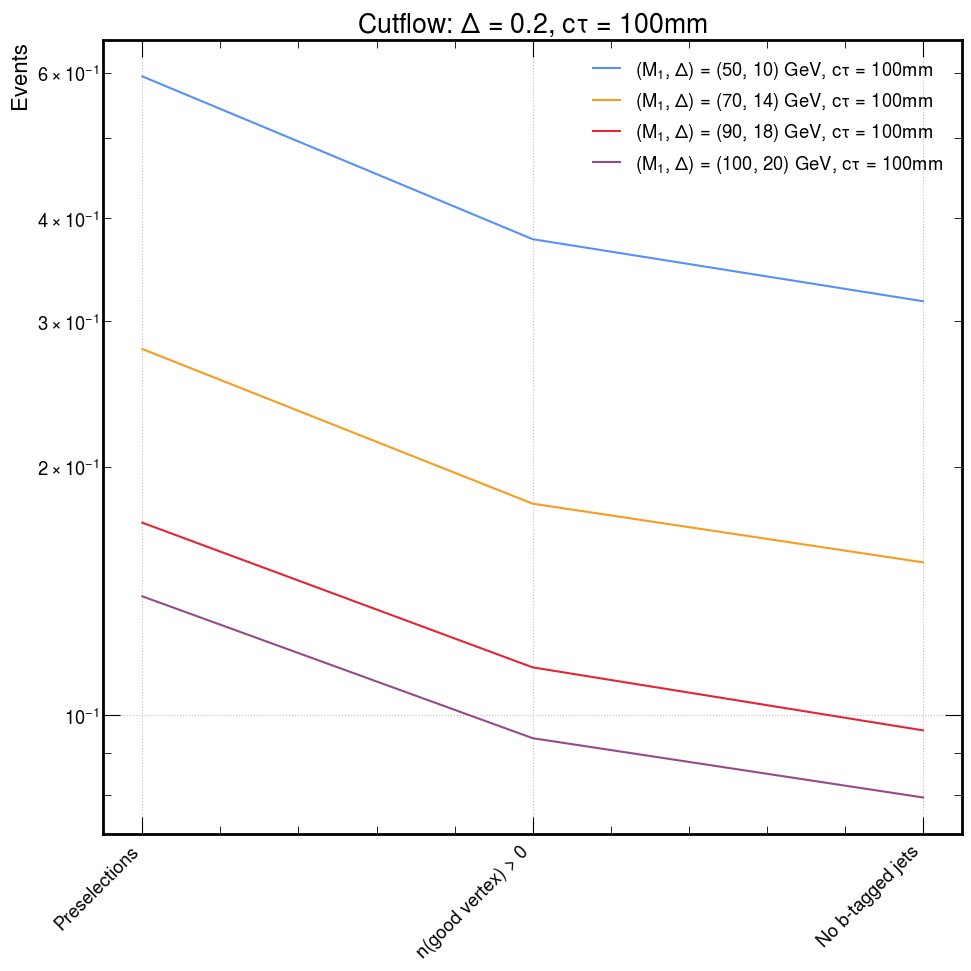

In [21]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [7]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,No b-tagged jets
DY-M50,0.00037497,0.00019092,0.00012720
SingleTop,0.00022295,0.00011320,0.00005985
ZJets,0.00231871,0.00083305,0.00062134
Multiboson,0.00062600,0.00028980,0.00019288
TTbar,0.00041435,0.00019768,0.00008184
QCD,0.00000217,0.00000042,0.00000018
WJets,0.00096802,0.00043286,0.00031321
DY-M4to50,0.00002494,0.00000955,0.00000609
TTX,0.00127165,0.00059360,0.00021012
ZGamma,0.00031387,0.00011939,0.00008848


In [8]:
# Save as csv
outdir = './csv/Cutflow/Efficiency/'
outname = f'Background_Efficiency_{suffix}'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/Efficiency//Background_Efficiency__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv


In [9]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets
DY-M50,"4,144.22","2,110.12","1,405.79"
SingleTop,"3,467.54","1,760.67",930.91
ZJets,"49,623.76","17,828.62","13,297.66"
Multiboson,"4,362.92","2,019.77","1,344.29"
TTbar,"20,615.75","9,835.50","4,071.73"
QCD,"46,583.80","8,975.80","3,836.16"
WJets,"169,523.91","75,804.04","54,850.08"
DY-M4to50,355.33,136.08,86.70
TTX,394.77,184.28,65.23
ZGamma,"1,609.71",612.30,453.76


In [10]:
# Save to csv
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted_{suffix}'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Weighted//Background_EventCount_Weighted__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv


In [11]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,No b-tagged jets
DY-M50,254356,95322,42290
SingleTop,43674,23397,13159
ZJets,709551,199155,133865
Multiboson,23952,10925,7017
TTbar,484904,233978,96745
QCD,30275,4319,1221
WJets,1118768,370148,217528
DY-M4to50,24340,7568,4042
TTX,130908,58696,19521
ZGamma,6251,2724,1841


In [12]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw_{suffix}'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Raw//Background_EventCount_Raw__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv


In [13]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 80342.30


In [14]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['No b-tagged jets']).transpose(), pd.DataFrame(bkg_cts_raw_df['No b-tagged jets']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,DY-M50,SingleTop,ZJets,Multiboson,TTbar,QCD,WJets,DY-M4to50,TTX,ZGamma,Total
Weighted Counts,"1,405.79",930.91,"13,297.66","1,344.29","4,071.73","3,836.16","54,850.08",86.70,65.23,453.76,"80,342.30"
Raw Counts,"42,290.00","13,159.00","133,865.00","7,017.00","96,745.00","1,221.00","217,528.00","4,042.00","19,521.00","1,841.00","537,229.00"


## Data

In [15]:
pd.options.display.float_format = '{:,.1f}'.format
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,No b-tagged jets
data_2018_Data_MET_UL18_MET_Run2018C,"68,834.0","35,295.0","18,667.0"
data_2018_Data_MET_UL18_MET_Run2018D,"304,561.0","149,840.0","82,229.0"
data_2018_Data_MET_UL18_MET_Run2018B,"60,605.0","31,078.0","16,088.0"
data_2018_Data_MET_UL18_MET_Run2018A,"119,182.0","62,503.0","31,461.0"
Total,"553,182.0","278,716.0","148,445.0"


In [16]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections        1.8
n(good vertex) > 0   2.3
No b-tagged jets     1.8
Name: Total, dtype: float64

In [17]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections        553,182.0
n(good vertex) > 0   278,716.0
No b-tagged jets     148,445.0
Name: Total, dtype: float64

In [18]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections        300,681.7
n(good vertex) > 0   119,267.2
No b-tagged jets      80,342.3
Name: Total, dtype: float64

/tmp/ipykernel_200934/234023744.py:18: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)


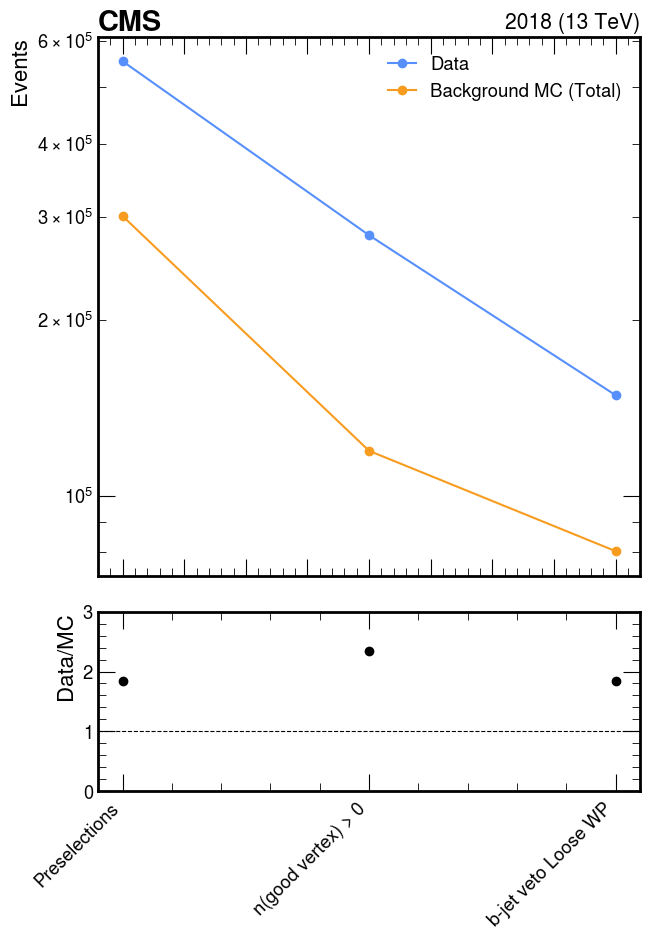

In [20]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')


plt.legend()

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,3])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'n(good vertex) > 0'
cuts[2] = 'b-jet veto Loose WP'

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')


### Plot the efficiency

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_background.png


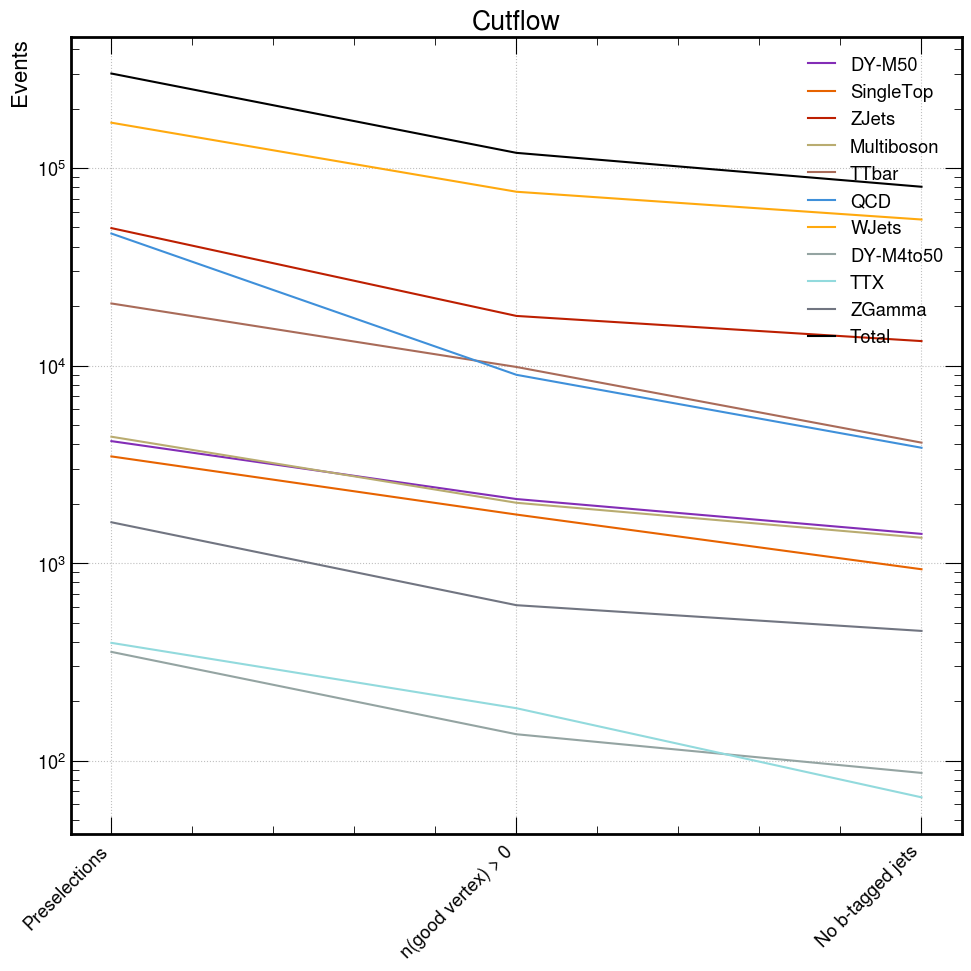

In [21]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': f'Cutflow_{suffix}_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/sqrt(B)

In [36]:
# S/sqrt(B) cutflow
pd.options.display.float_format = '{:,.5f}'.format
utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.00000,0.00000,0.00000
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,0.00002,0.00003,0.00003
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,0.00001,0.00002,0.00003
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.00015,0.00033,0.00041
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.00000,0.00000,0.00000
...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,0.00011,0.00025,0.00032
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,0.07449,0.15057,0.18943
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,0.00310,0.00684,0.00858
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.00001,0.00002,0.00003


Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p1_ct_1_m5to40.png


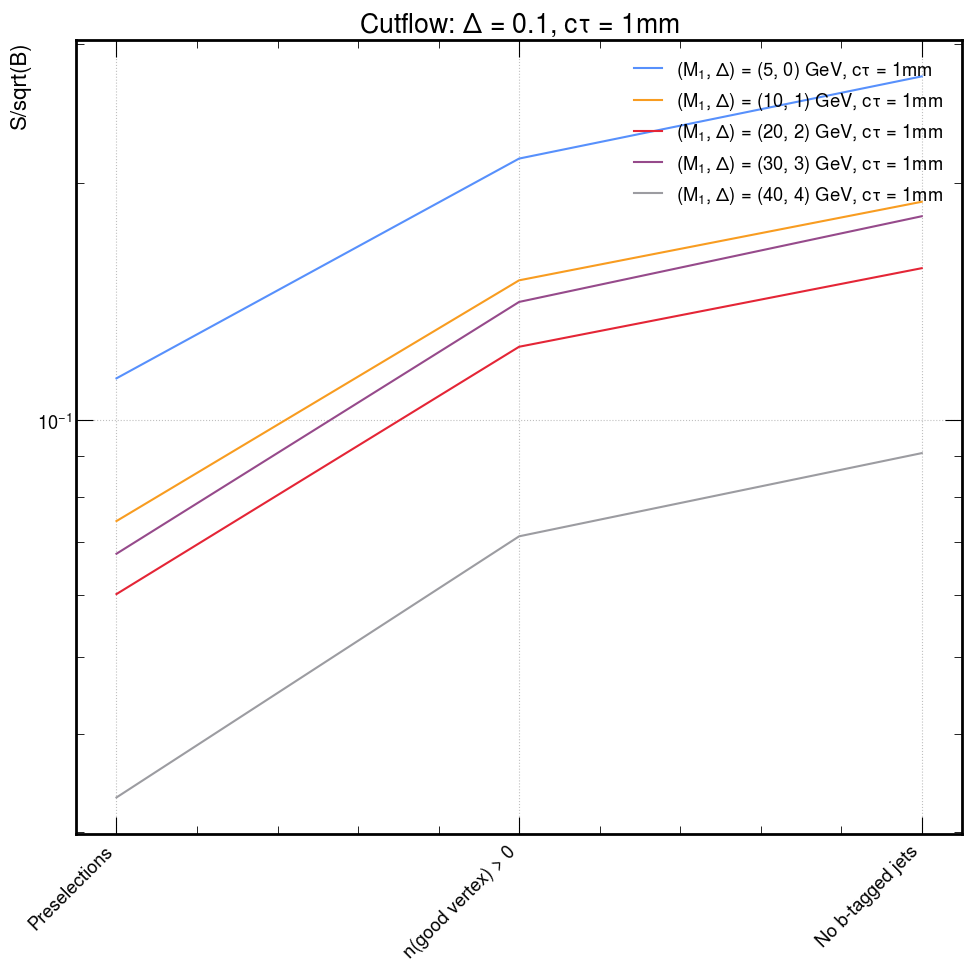

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p1_ct_10_m5to40.png


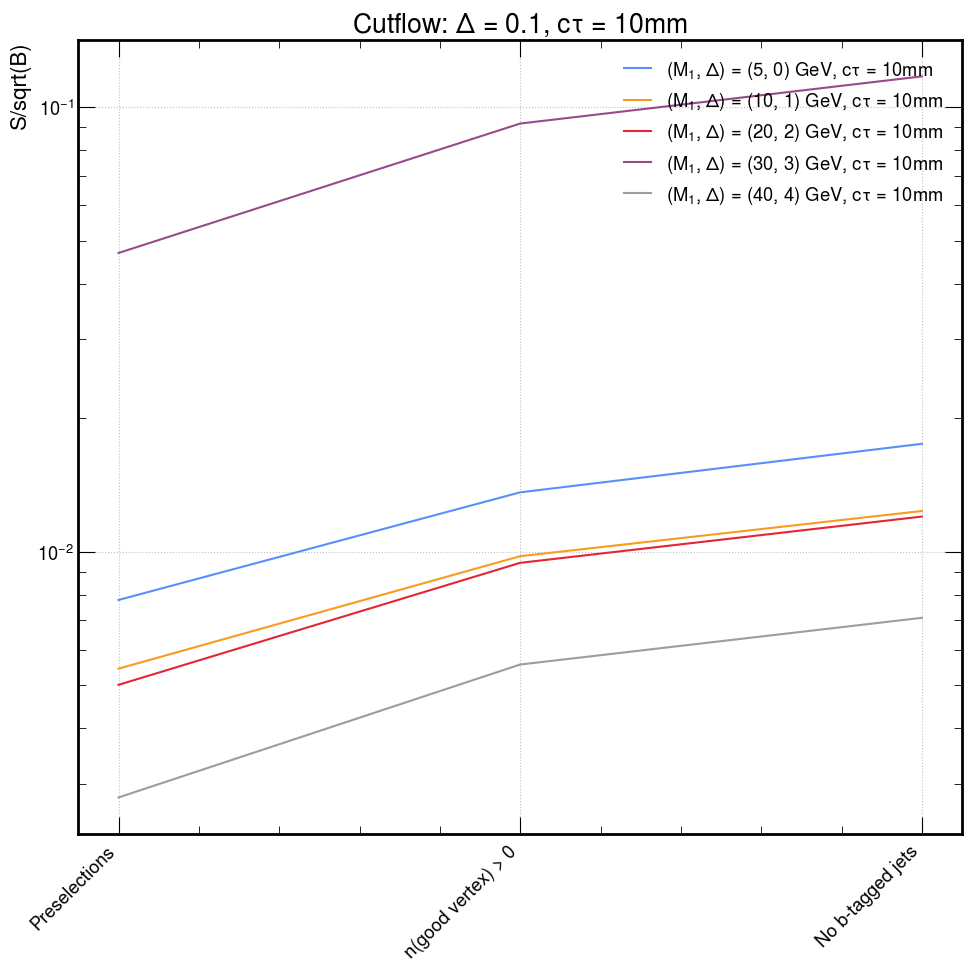

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p1_ct_100_m5to40.png


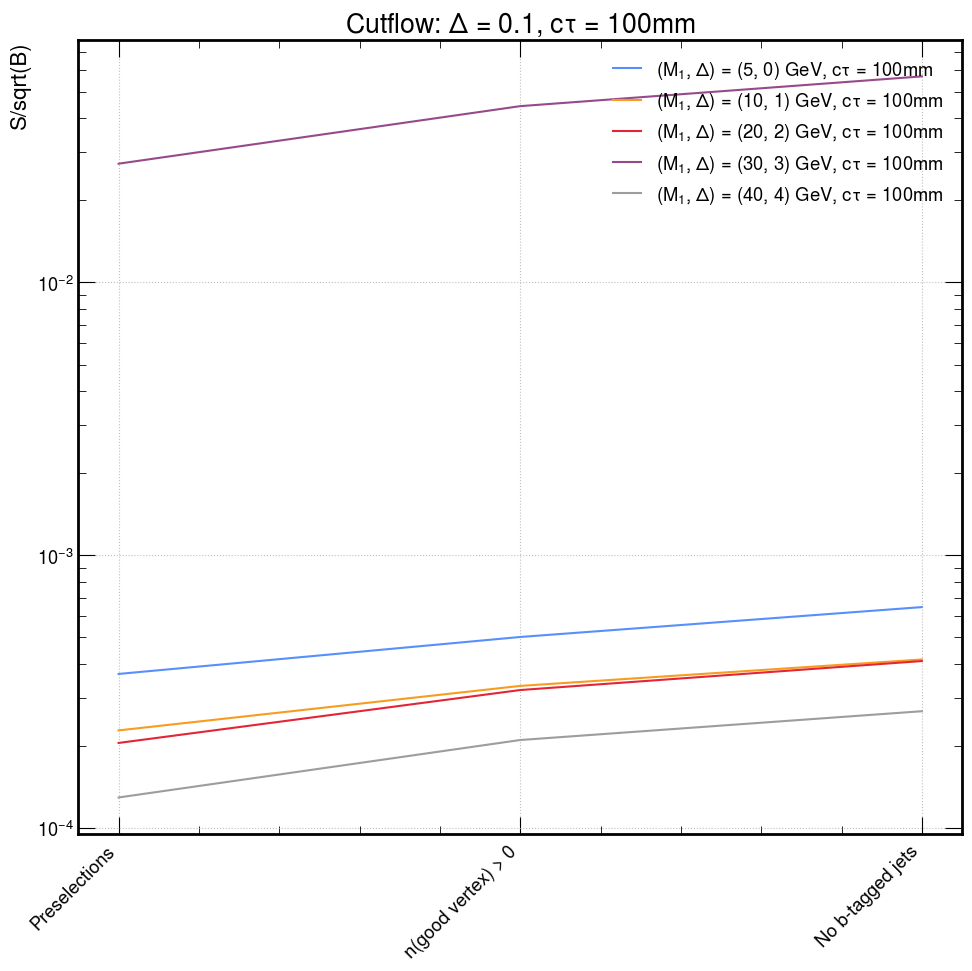

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p2_ct_1_m5to40.png


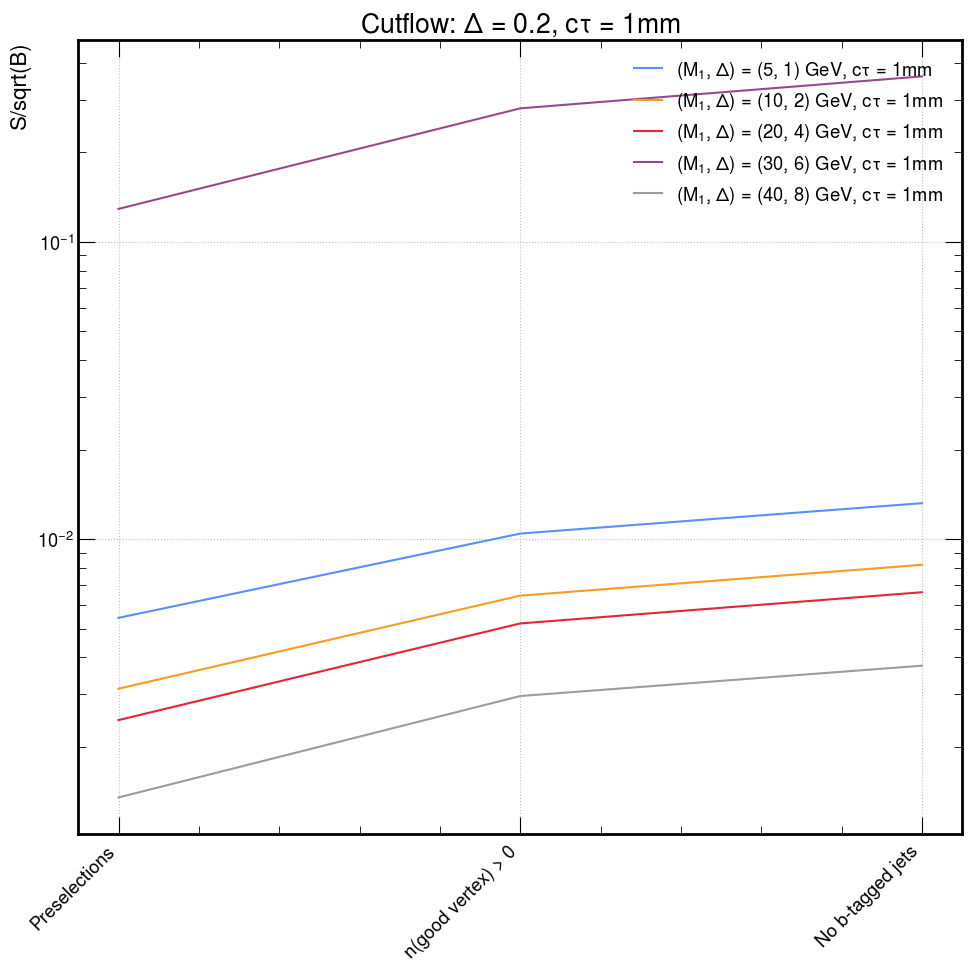

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p2_ct_10_m5to40.png


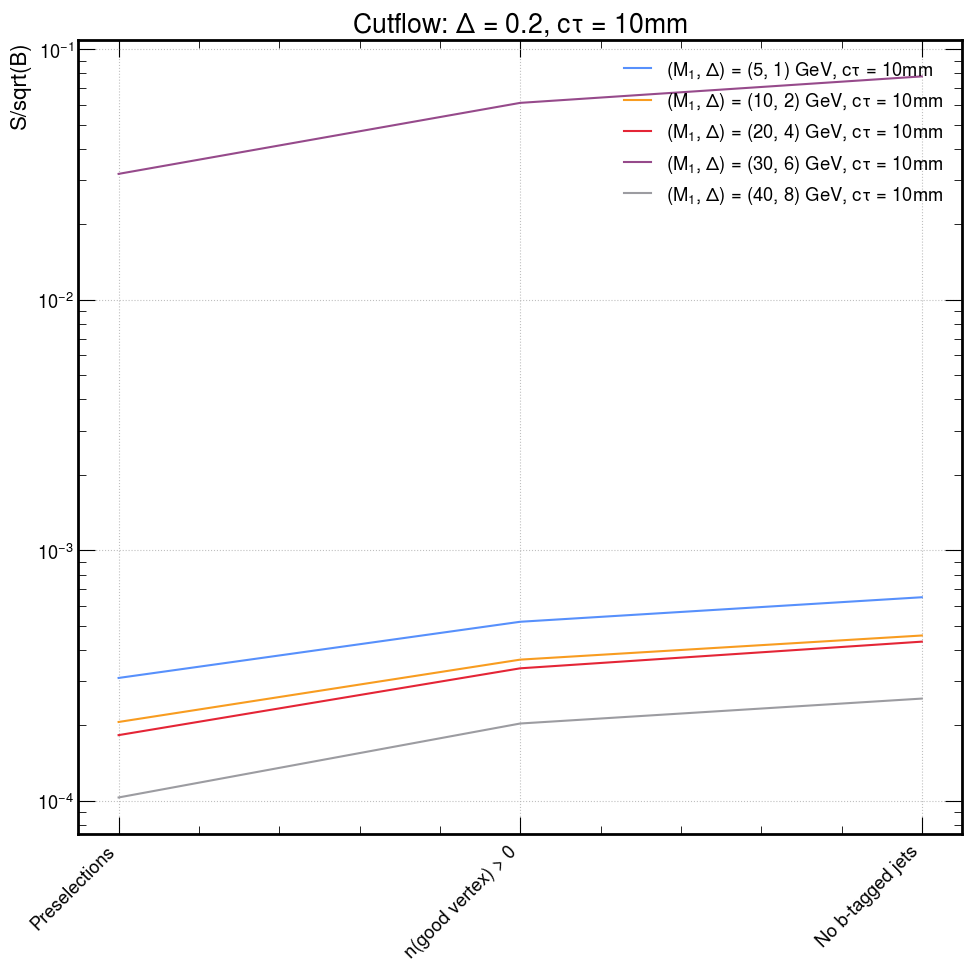

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p2_ct_100_m5to40.png


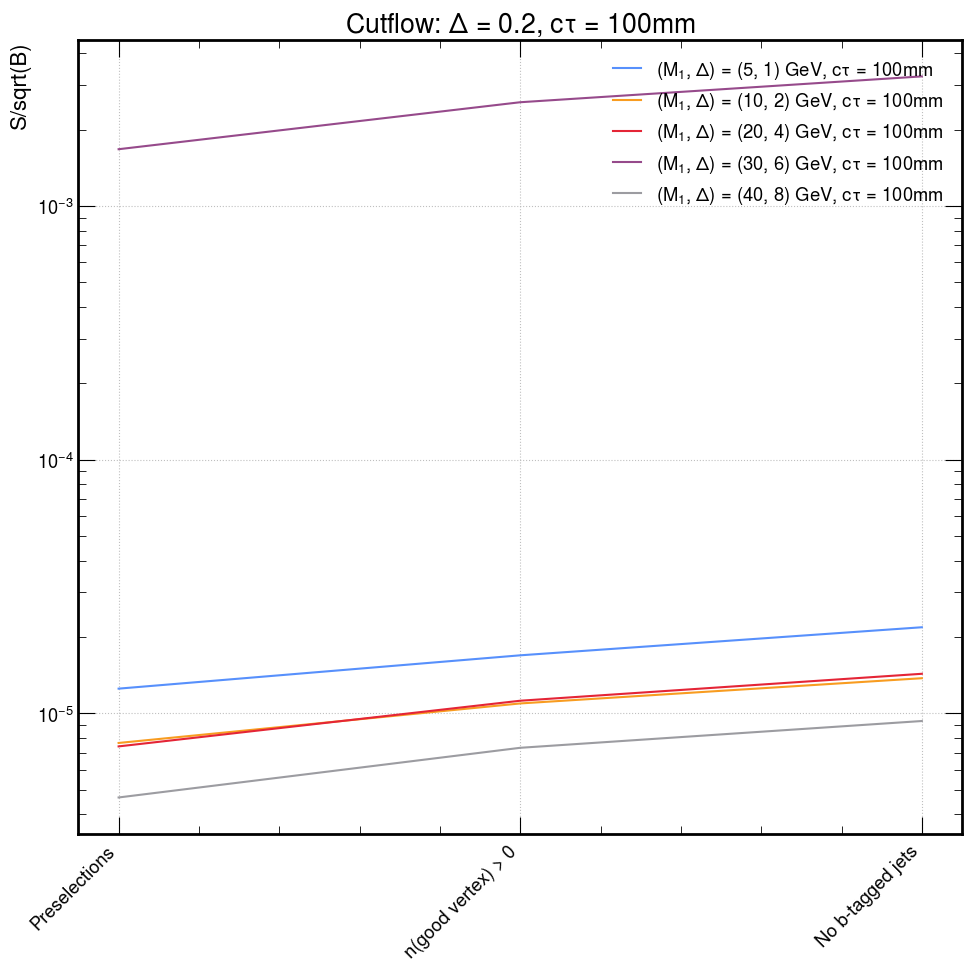

In [37]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p1_ct_1_m50to100.png


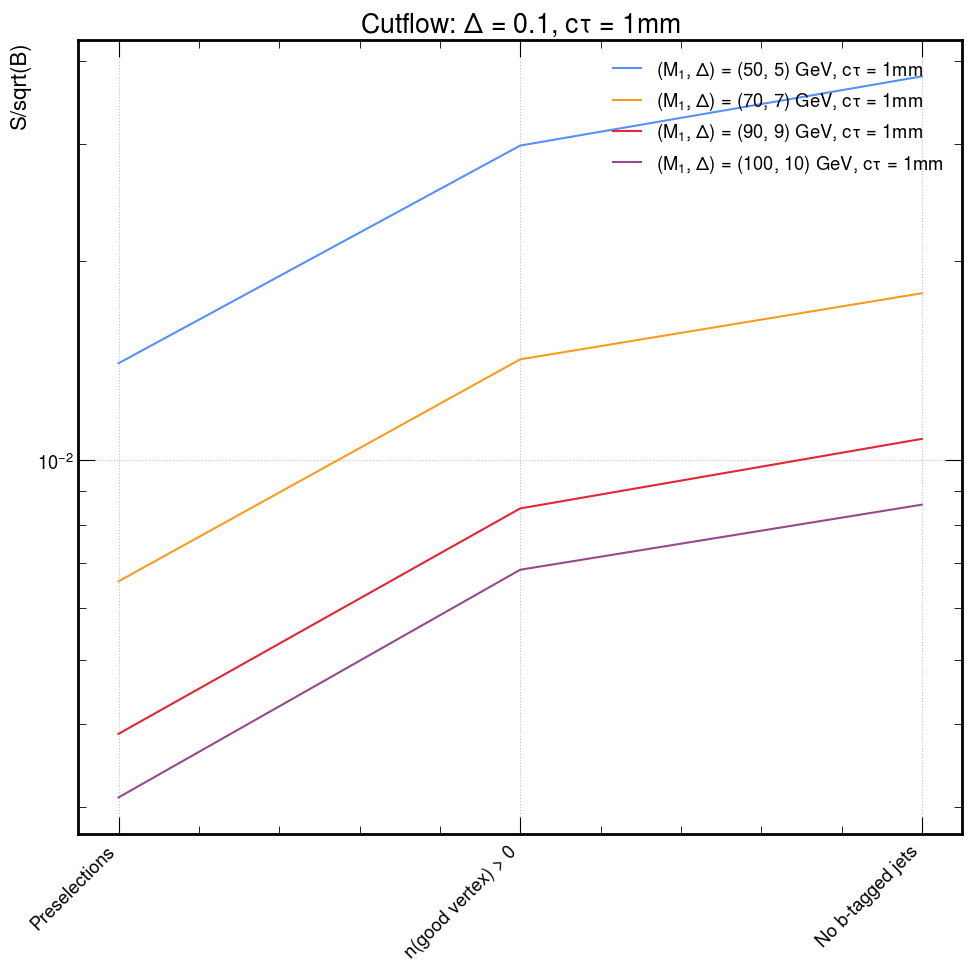

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p1_ct_10_m50to100.png


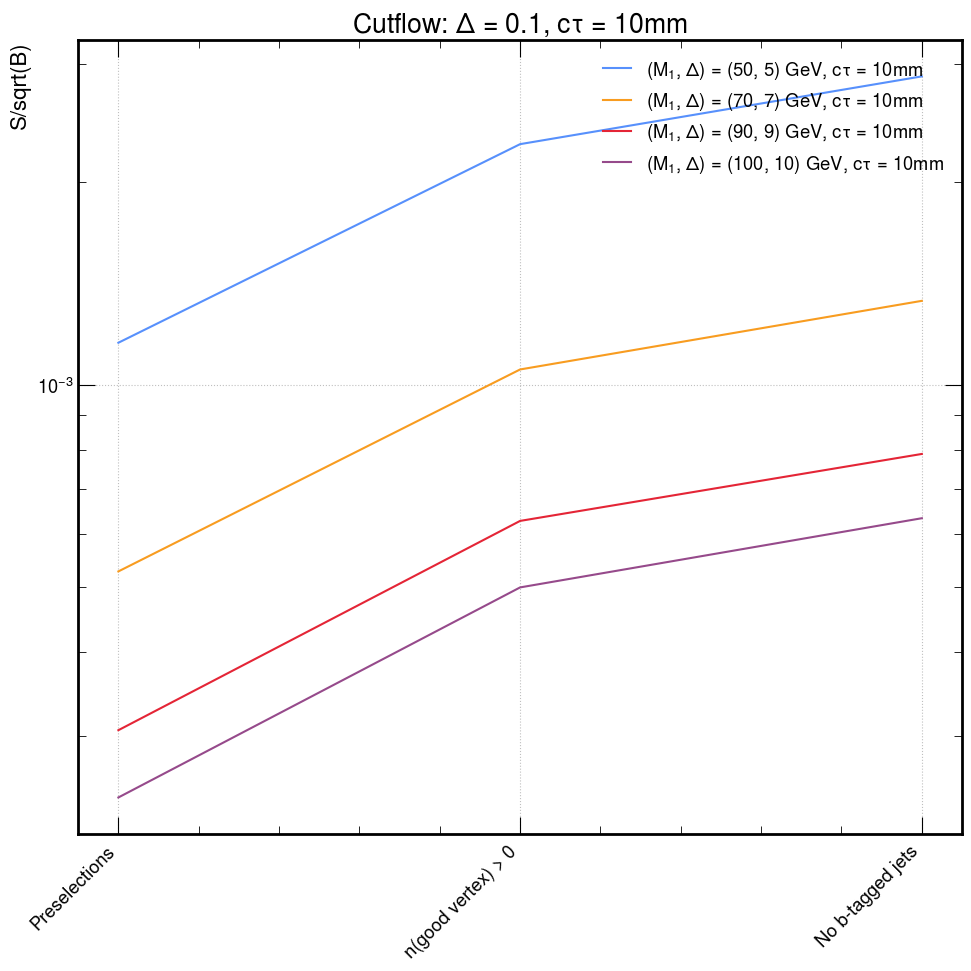

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p1_ct_100_m50to100.png


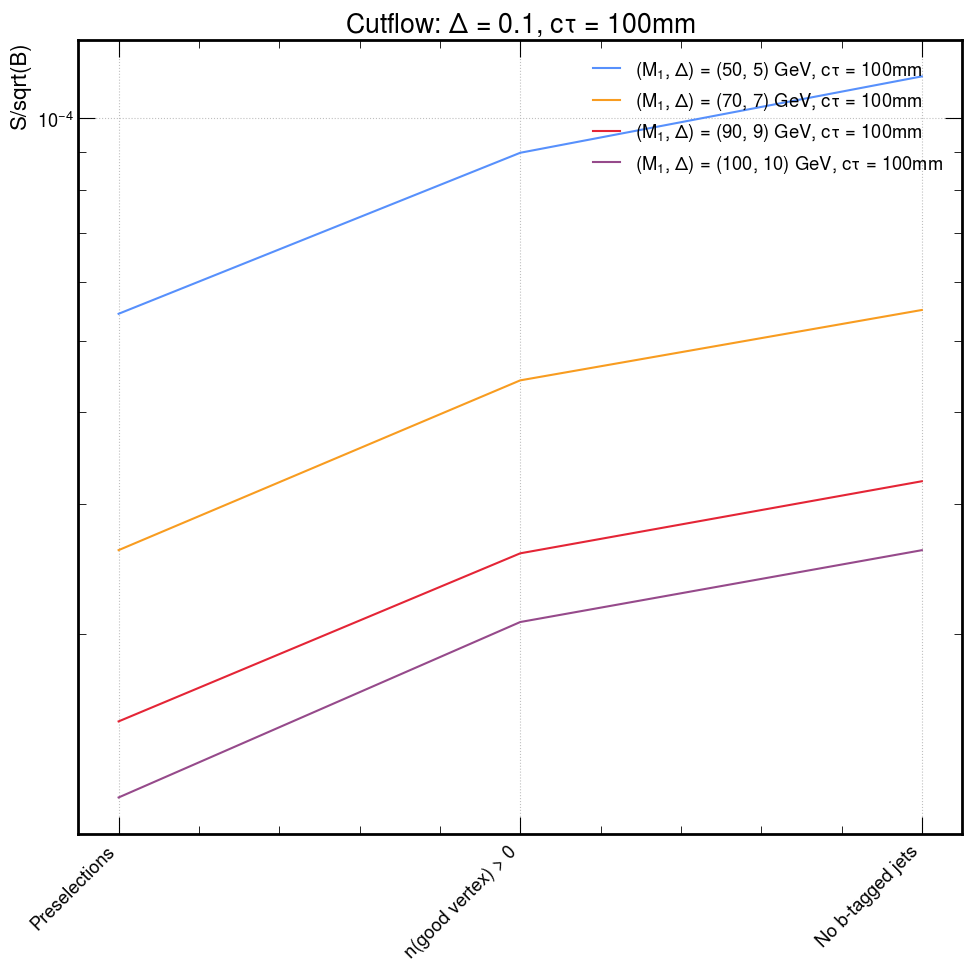

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p2_ct_1_m50to100.png


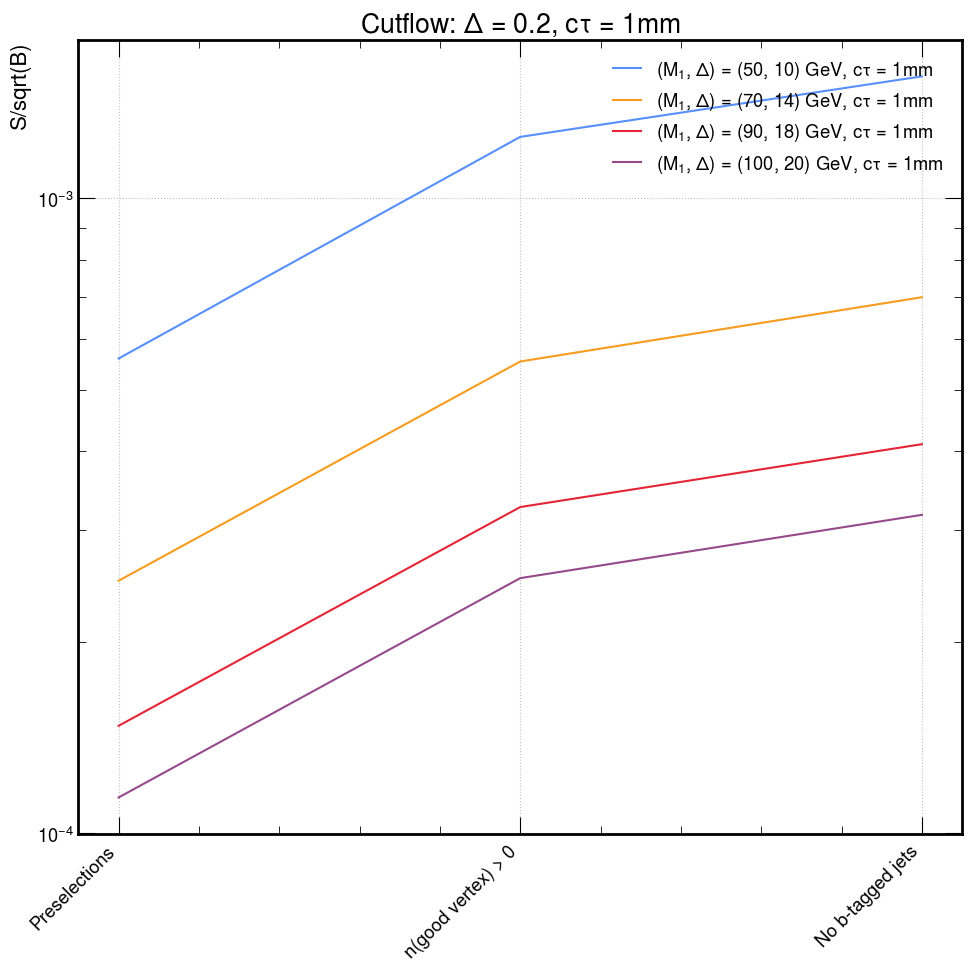

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p2_ct_10_m50to100.png


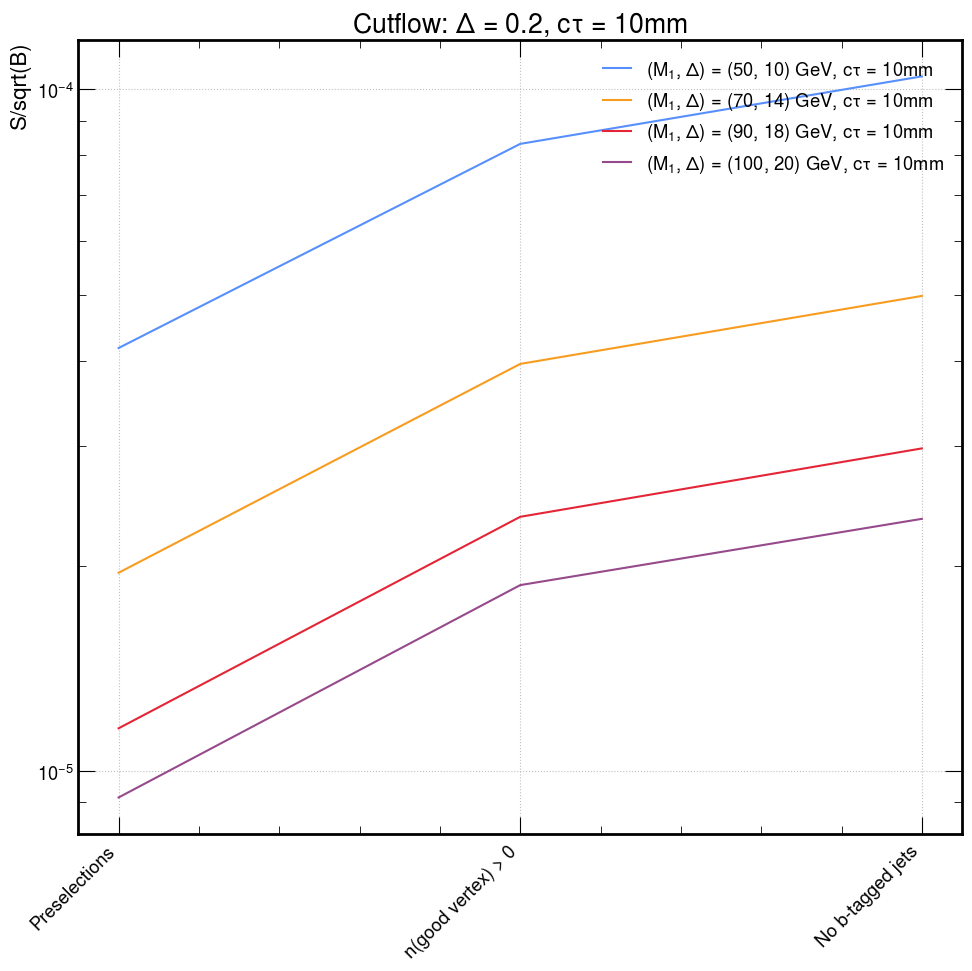

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0_s_over_b_delta_0p2_ct_100_m50to100.png


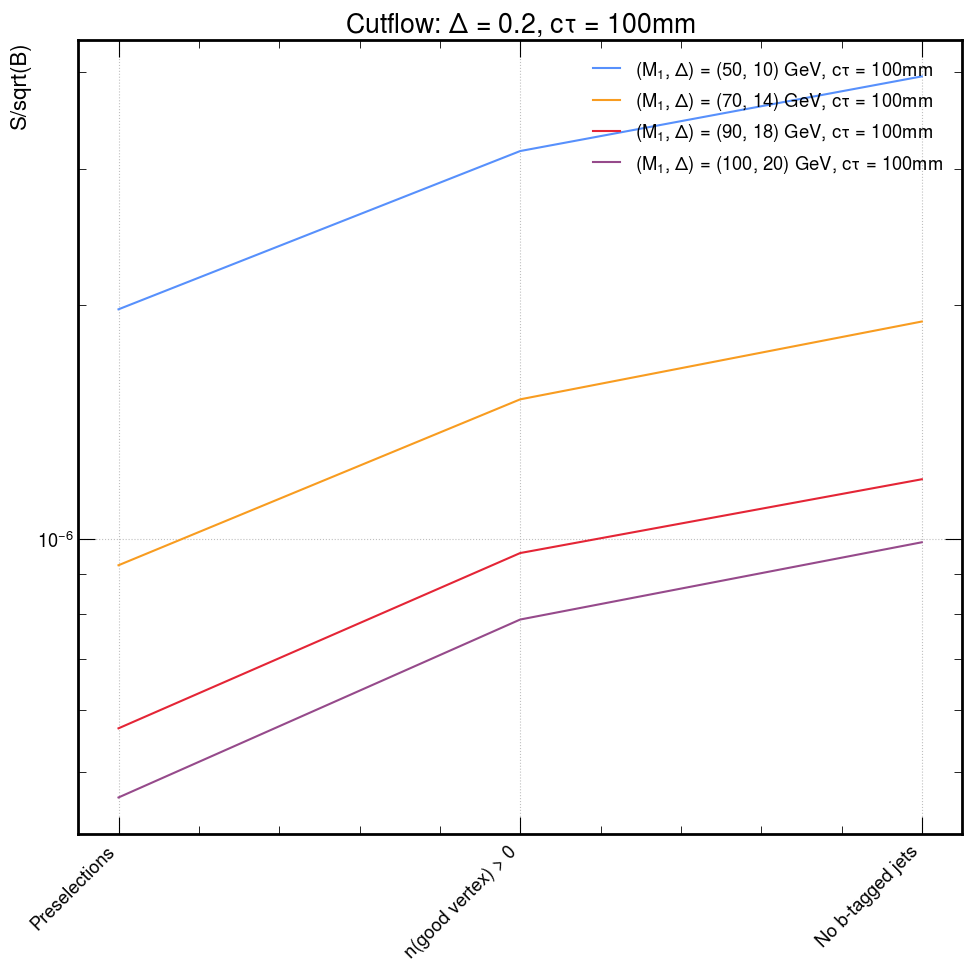

In [38]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

#### S/sqrt(B) at the end of the cutflow

In [39]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

80342.3011353959

In [40]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [41]:
pd.options.display.float_format = '{:,.4f}'.format

In [42]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,No b-tagged jets,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,"1,403.2880",5.0000,0.1000,10.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"21,956.3457",5.0000,0.1000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,51.8816,5.0000,0.1000,100.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,060.3337",5.0000,0.2000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,52.1706,5.0000,0.2000,10.0000
...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,1.8842,100.0000,0.2000,10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,25.4977,100.0000,0.2000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,689.1437,100.0000,0.1000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,2.0885,100.0000,0.1000,100.0000


In [43]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [44]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,"1,403.2880","80,342.3011",4.9508
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"21,956.3457","80,342.3011",77.4619
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,51.8816,"80,342.3011",0.1830
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,"1,060.3337","80,342.3011",3.7409
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,52.1706,"80,342.3011",0.1841
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,25.4977,"80,342.3011",0.0900
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,100.0000,0.1000,1.0000,689.1437,"80,342.3011",2.4313
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,2.0885,"80,342.3011",0.0074
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,50.8634,"80,342.3011",0.1794


In [45]:
outdir = './csv/SR_Yields/'
outname = f'S_over_B_{suffix}'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//S_over_B__SRbeforeISRcuts_good_vtx_idOnly_NJetG0.csv


### ctau = 1mm

In [46]:
ct = 1.0

In [47]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"21,956.3457","80,342.3011",77.4619
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"15,218.8542","80,342.3011",53.6920
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"12,533.6462","80,342.3011",44.2186
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"14,588.9064","80,342.3011",51.4696
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"7,299.8320","80,342.3011",25.7538
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,"3,046.8664","80,342.3011",10.7493
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,"1,995.4366","80,342.3011",7.0399
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,"1,435.4929","80,342.3011",5.0644
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,"1,085.9821","80,342.3011",3.8313
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,865.8970,"80,342.3011",3.0549


In [48]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,"1,060.3337","80,342.3011",3.7409
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,657.8239,"80,342.3011",2.3208
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,531.9865,"80,342.3011",1.8768
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"28,920.6463","80,342.3011",102.0319
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,301.1700,"80,342.3011",1.0625
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,125.1102,"80,342.3011",0.4414
62,60.0,0.2,1.0,0.0000,"80,342.3011",0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,56.1465,"80,342.3011",0.1981
65,80.0,0.2,1.0,0.0000,"80,342.3011",0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,32.9455,"80,342.3011",0.1162


### ctau = 10mm

In [49]:
ct = 10.0

In [50]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,"1,403.2880","80,342.3011",4.9508
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,991.0756,"80,342.3011",3.4965
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,962.7654,"80,342.3011",3.3966
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"9,404.8604","80,342.3011",33.1803
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,569.9433,"80,342.3011",2.0108
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,230.9253,"80,342.3011",0.8147
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,145.6849,"80,342.3011",0.5140
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,107.0730,"80,342.3011",0.3778
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,81.7885,"80,342.3011",0.2885
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,63.3860,"80,342.3011",0.2236


In [51]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,52.1706,"80,342.3011",0.1841
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,36.7045,"80,342.3011",0.1295
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,34.6893,"80,342.3011",0.1224
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"6,256.6926","80,342.3011",22.0736
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,20.5581,"80,342.3011",0.0725
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,8.3944,"80,342.3011",0.0296
63,60.0,0.2,10.0,0.0000,"80,342.3011",0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,3.9997,"80,342.3011",0.0141
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,2.9820,"80,342.3011",0.0105
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,2.3901,"80,342.3011",0.0084


### ctau = 100mm

In [52]:
ct = 100.0

In [53]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,51.8816,"80,342.3011",0.1830
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,33.3398,"80,342.3011",0.1176
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,32.9038,"80,342.3011",0.1161
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"4,573.6779","80,342.3011",16.1359
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,21.5460,"80,342.3011",0.0760
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,9.1589,"80,342.3011",0.0323
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,6.0141,"80,342.3011",0.0212
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,4.4190,"80,342.3011",0.0156
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,3.3091,"80,342.3011",0.0117
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,2.5898,"80,342.3011",0.0091


In [54]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,1.7536,"80,342.3011",0.0062
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,1.1042,"80,342.3011",0.0039
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,1.1494,"80,342.3011",0.0041
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,260.4565,"80,342.3011",0.9189
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.7487,"80,342.3011",0.0026
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.3174,"80,342.3011",0.0011
64,60.0,0.2,100.0,0.0000,"80,342.3011",0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.1532,"80,342.3011",0.0005
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.1236,"80,342.3011",0.0004
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0958,"80,342.3011",0.0003
